<a href="https://colab.research.google.com/github/Radhika-0403/Machine-Learning/blob/main/RNN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Input, concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [116]:
df=pd.read_csv("/content/insurance.csv")

In [117]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [118]:
df.shape

(1338, 7)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [120]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

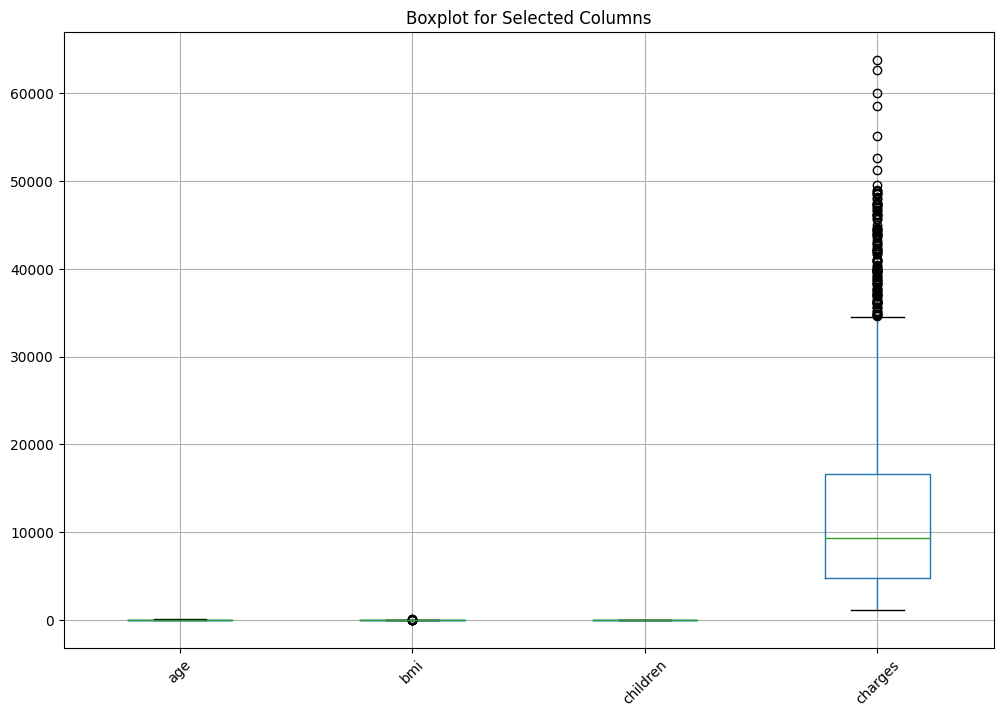

In [137]:
plt.figure(figsize=(12, 8))
numerical_df.boxplot(rot=45)
plt.title('Boxplot for Selected Columns')
plt.show()

In [138]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [139]:
# Apply log transformation to the 'charges' colum
df['charges'] = np.log1p(df['charges'])

In [140]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])



In [141]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

In [126]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,9.734236
1,18,1,33.770,1,0,2,7.453882
2,28,1,33.000,3,0,2,8.400763
3,33,1,22.705,0,0,1,9.998137
4,32,1,28.880,0,0,1,8.260455
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,9.268755
1334,18,0,31.920,0,0,0,7.699381
1335,18,0,36.850,0,0,2,7.396847
1336,21,0,25.800,0,0,3,7.605365


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [143]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [144]:
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression



In [145]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [146]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/100
24/24 - 1s - loss: 2.3435 - val_loss: 1.9039 - 878ms/epoch - 37ms/step
Epoch 2/100
24/24 - 0s - loss: 1.9473 - val_loss: 1.6484 - 96ms/epoch - 4ms/step
Epoch 3/100
24/24 - 0s - loss: 1.6008 - val_loss: 1.3971 - 89ms/epoch - 4ms/step
Epoch 4/100
24/24 - 0s - loss: 1.2977 - val_loss: 1.1559 - 83ms/epoch - 3ms/step
Epoch 5/100
24/24 - 0s - loss: 1.0360 - val_loss: 0.9590 - 87ms/epoch - 4ms/step
Epoch 6/100
24/24 - 0s - loss: 0.8241 - val_loss: 0.7868 - 80ms/epoch - 3ms/step
Epoch 7/100
24/24 - 0s - loss: 0.6644 - val_loss: 0.6651 - 75ms/epoch - 3ms/step
Epoch 8/100
24/24 - 0s - loss: 0.5484 - val_loss: 0.5573 - 88ms/epoch - 4ms/step
Epoch 9/100
24/24 - 0s - loss: 0.4664 - val_loss: 0.4882 - 80ms/epoch - 3ms/step
Epoch 10/100
24/24 - 0s - loss: 0.4092 - val_loss: 0.4390 - 88ms/epoch - 4ms/step
Epoch 11/100
24/24 - 0s - loss: 0.3668 - val_loss: 0.3919 - 115ms/epoch - 5ms/step
Epoch 12/100
24/24 - 0s - loss: 0.3330 - val_loss: 0.3609 - 78ms/epoch - 3ms/step
Epoch 13/100
24/24 - 0

In [37]:
weights = model.layers[0].get_weights()[0]

# Calculate feature importance based on the weights
feature_importance = np.mean(np.abs(weights), axis=0)

print("X.columns shape:", X.columns.shape)
print("feature_importance shape:", feature_importance.shape)

X.columns shape: (6,)
feature_importance shape: (6,)


In [38]:
feature_importance_df = pd.DataFrame({'Feature': X.columns.values, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

    Feature  Importance
4    smoker    2.120244
5    region    2.035079
0       age    1.985845
1       sex    1.813505
3  children    1.753036
2       bmi    1.687530


In [147]:
y_pred = model.predict(X_test)

13/13 [==============================] - 0s 2ms/step


In [148]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 0.005238947385208947


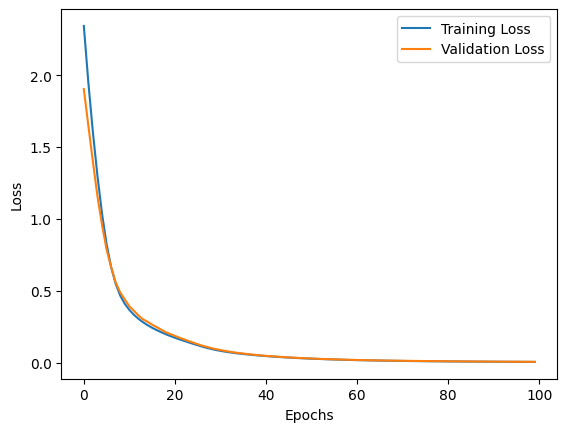

In [149]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [150]:
import matplotlib.pyplot as plt

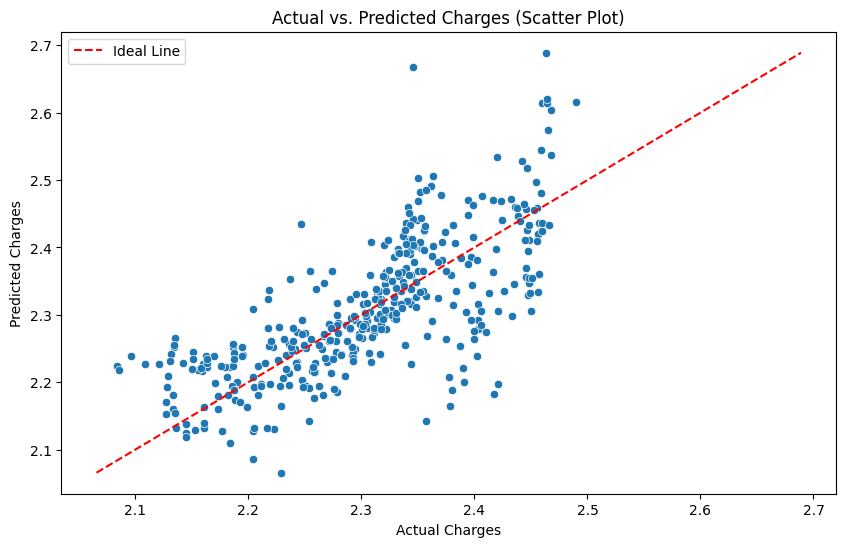

In [153]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test.ravel(), y=y_pred.ravel())
plt.plot([min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())],
         [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())],
         linestyle='--', color='red', label='Ideal Line')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges (Scatter Plot)')
plt.legend()
plt.show()